<a href="https://colab.research.google.com/github/priscilla1812/OIBSIP/blob/main/Task_1_Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Priscilla Philby Oommen

## Oasis Infobyte Data Science Internship Oct - Nov 2023

## **TASK 1: IRIS FLOWER CLASSIFICATION**

**Problem Statement:**

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

The dataset is used for supervised classification tasks aiming to accurately classify Iris flowers based on their measurements.

The Iris flower classification dataset comprises 150 samples of Iris flowers, categorized into three species:
* Iris setosa
* Iris versicolor
* Iris virginica

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.


Attribute Information:

* Sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm
* class

In [1]:
# required python libraries are imported
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## A. Load the Dataset

In [2]:
# Mount Drive and Read csv file
dfiris = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Science/Iris.csv")

# shows the datatype of dfiris
type(dfiris)

pandas.core.frame.DataFrame

In [3]:
dfiris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Drop the 'Id' column as it is not required for analysis
dfiris = dfiris.drop(columns=["Id"])

# Displays the first 5 records of the dataset
dfiris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Display basic statistics about the data
dfiris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Display information about the datatype of each column and null values
dfiris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
# Displays the shape of a DataFrame
dfiris.shape
# The DataFrame has a shape of (150, 5) , this implies that the DataFrame is made up of 150 rows and 5 columns of data.

(150, 5)

In [7]:
# Display the number of samples for each class
dfiris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## B. Exploratory Data Analysis (EDA)

In [8]:
dfiris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: >

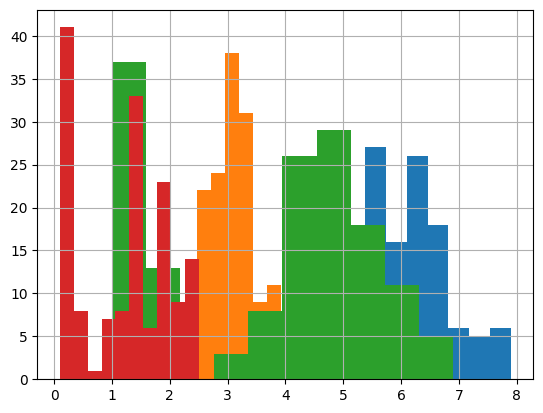

In [9]:
#Plotting the histogram of all features toghether
dfiris['SepalLengthCm'].hist()
dfiris['SepalWidthCm'].hist()
dfiris['PetalLengthCm'].hist()
dfiris['PetalWidthCm'].hist()

In [10]:
# Plot scatterplots to visualize relationships between features
colors = ['red', 'orange', 'blue']
species = ['Iris-setosa', 'Iris-versicolor' , 'Iris-virginica']

**1, Data Visualisation Using Matplotlib**

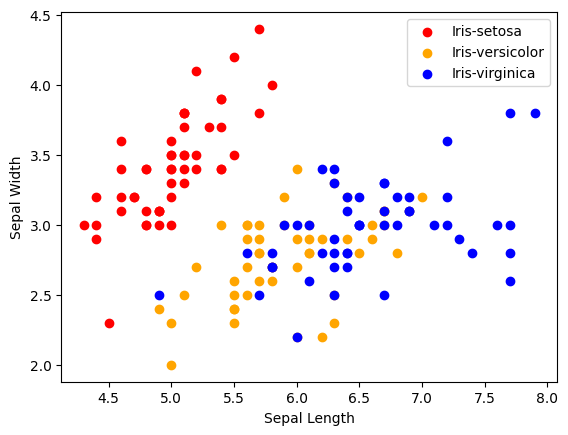

In [11]:
# Scatter plot for Sepal Length vs Sepal Width
for i in range(3):
    x = dfiris[dfiris['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

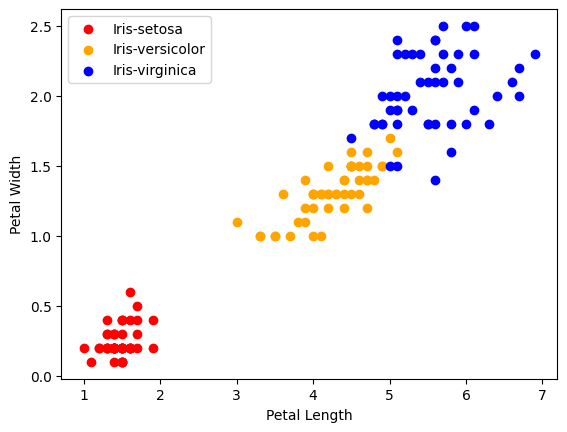

In [12]:
# Scatter plot for Petal Length vs Petal Width
for i in range(3):
    x = dfiris[dfiris['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

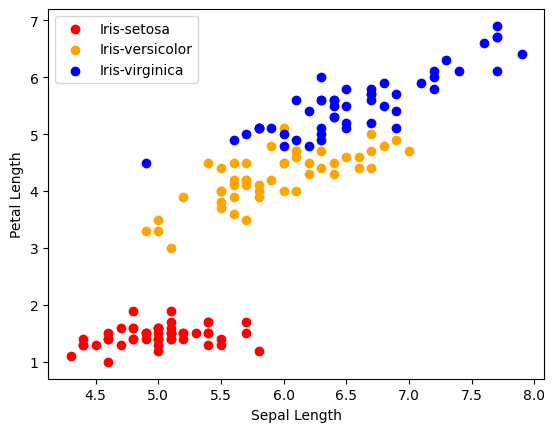

In [13]:
# Scatter plot for Petal Length vs Sepal Length
for i in range(3):
    x = dfiris[dfiris['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

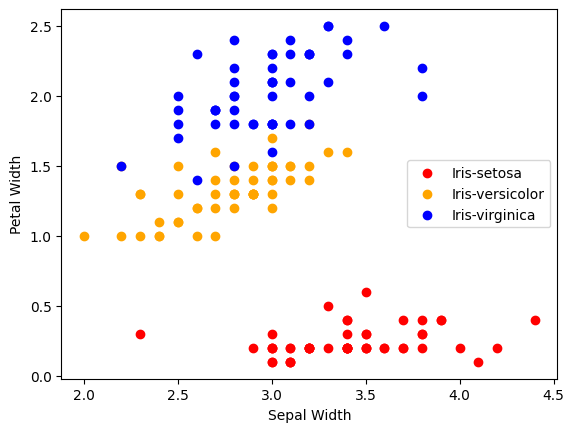

In [14]:
# Scatter plot for Sepal Width vs Petal Width
for i in range(3):
    x = dfiris[dfiris['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

**2, Data Visualisation Using Seaborn**

<Axes: title={'center': 'Sepal Dimensions'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

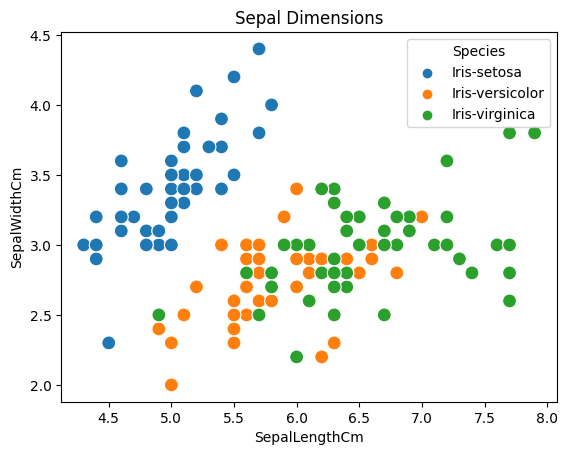

In [15]:
# We can use a scatter plot to visualize how sepal length & sepal width vary using the scatterplot function from the seaborn module (imported as sns).
# We can color the dots using the flower species as a hue. We can also make the points larger using the s argument.
# Adding hues makes the plot more informative. We can immediately tell that Setosa flowers have a smaller sepal length but higher sepal widths.
# In contrast, the opposite is true for Virginica flowers.

# Customizing Seaborn Figures
# Since Seaborn uses Matplotlib's plotting functions internally, we can use functions like plt.figure and plt.title to modify the figure.

# plt.title('Sepal Dimensions')
# sns.scatterplot(x=dfiris.SepalLengthCm, y=dfiris.SepalWidthCm, hue=dfiris.Species, s=100);

# Plotting using Pandas Data Frames
# Seaborn has in-built support for Pandas data frames.
# Instead of passing each column as a series, you can provide column names and use the data argument to specify a data frame.

plt.title('Sepal Dimensions')
sns.scatterplot(x='SepalLengthCm',
                y='SepalWidthCm',
                hue='Species',
                s=100,
                data=dfiris)

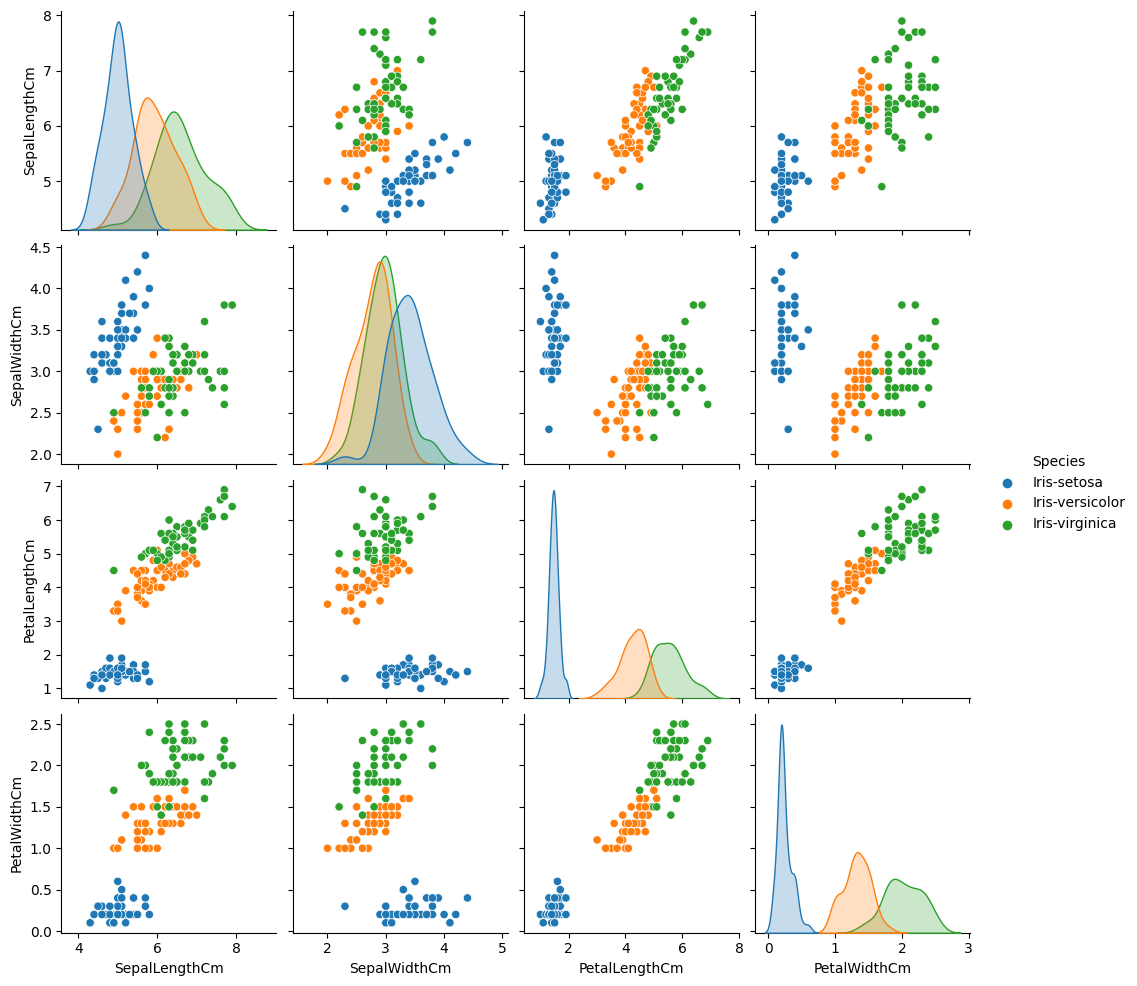

In [16]:
#Visualise the whole dataset
sns.pairplot(dfiris, hue='Species')

## C. Correlation Matrix

* A correlation matrix is a table showing correlation coefficients between variables.
* Each cell in the table shows the correlation between two variables.
* The value is in the range of -1 to 1.
* If two varibles have high correlation, we can neglect one variable from those two.

In [17]:
# Compute the correlation matrix
# dfiris.corr()
dfiris.corr(numeric_only = True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

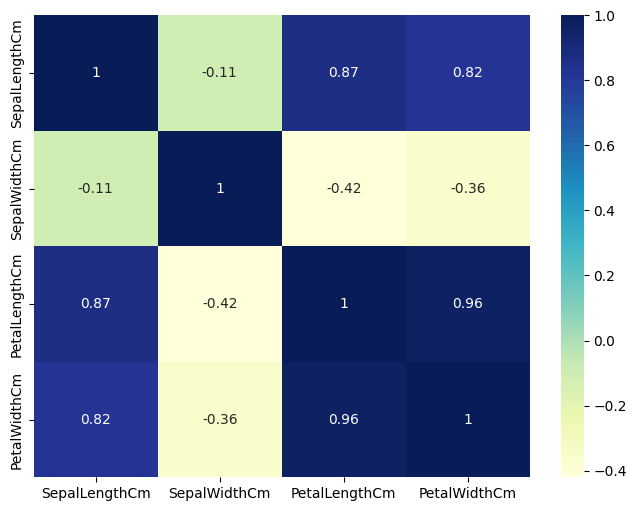

In [18]:
# display the correlation matrix using a heatmap
corr = dfiris.corr(numeric_only = True)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, ax=ax, cmap='YlGnBu')

## D. Preprocessing the Dataset & Model Preparation

Label Encoder

* In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers.

* Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [19]:
#Label encoding to convert class labels into numeric form
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
dfiris['Species'] = lab.fit_transform(dfiris['Species'])
dfiris['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [20]:
# check for null values
dfiris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [21]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = dfiris.drop(columns=['Species'])
Y = dfiris['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state = 42)

# With random_state=42 , we get the same train and test sets across different executions
# The train and test sets directly affect the model's performance score.
# random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic.

# If you don't specify the random_state in the code then every time you run(execute) your code, a new random value is generated
# and the train and test datasets would have different values each time.

# If you set random_state = 0 or 1 or 42 or any other integer then no matter how many times you execute your code,
# the result would be the same .i.e, same values in train and test datasets.

In [22]:
# StandardScaler() standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


## E. Model Training

In [23]:
# K-nearest Neighbours Model (KNN)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values) #Here x.values will have only values without headers
# X = X.values # conversion of X  into array
# print metric to get performance
print("Accuracy (KNN): ", model.score(x_test.values, y_test.values) * 100)

Accuracy (KNN):  98.33333333333333


## F. Prediction

In [24]:
# x_new = np.array([[5, 2.9, 1, 0.2]])
# prediction = knn.predict(x_new)
# print("Prediction: {}".format(prediction))

# using inputs to predict the output
features = np.array([[5, 2.9, 1, 0.2]]) #6.7, 3.0, 5.2, 2.3
prediction = model.predict(features)

print("Prediction: {}".format(prediction)) #0=>Iris-setosa , 1=>Iris-versicolor ,2=>Iris-virginica

Prediction: [0]


## G. Confusion Matrix

* A confusion matrix is a table that is used to define the performance of a classification algorithm.
* It visualizes and summarizes the performance of a classification algorithm.

In [25]:
from sklearn.metrics import confusion_matrix

y_predict = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


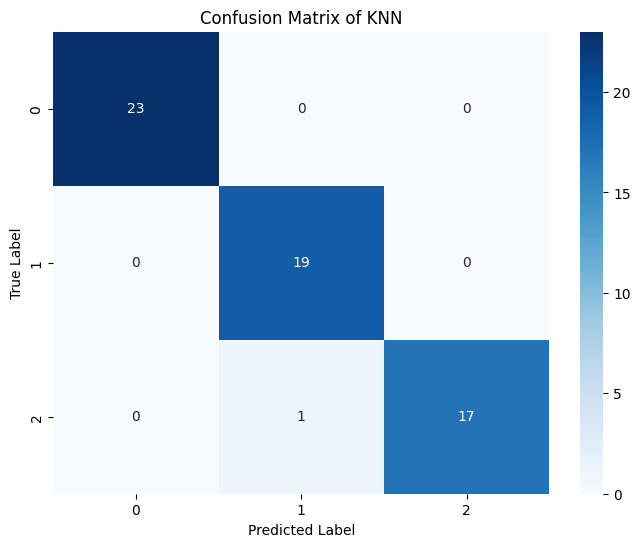

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()